# Import Packages

In [1]:
using Gurobi
using PiecewiseLinear
using JuMP

# Basic example: Use 5 linear functions to approximate:
$$ f:[0,6] \rightarrow \mathbb{R} $$
$$f(x) = x^2 - 3x +2 $$

## 1) Norm $L^2$

Academic license - for non-commercial use only - expires 2023-08-07


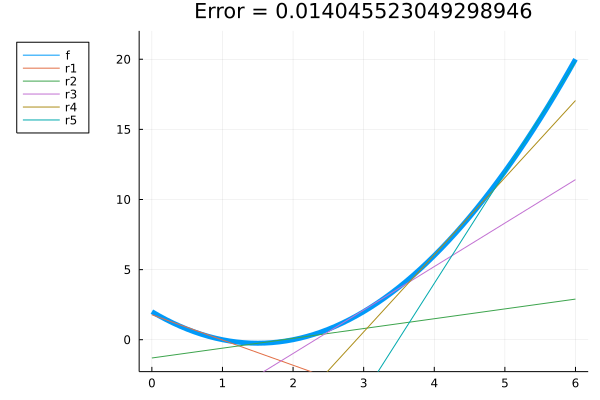

In [2]:
prb = create((x->x^2-3x+2), collect(0.0:0.1:6.0), 5, Gurobi.Optimizer);
fit!(prb);
plot(prb)

## 1) Norm $L^1$

Academic license - for non-commercial use only - expires 2023-08-07


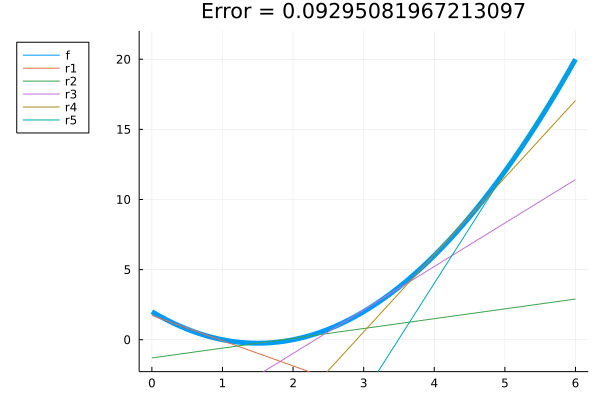

In [3]:
prb = create((x->x^2-3x+2), collect(0.0:0.1:6.0), 5, Gurobi.Optimizer, norm=PiecewiseLinear.L1);
fit!(prb);
plot(prb)

## 3) Norm $L^\infty$

Academic license - for non-commercial use only - expires 2023-08-07


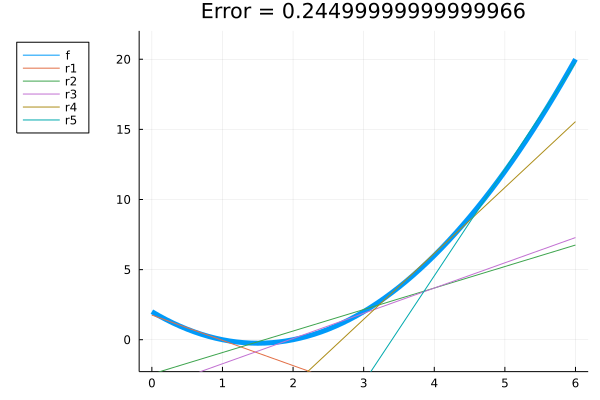

In [4]:
prb = create((x->x^2-3x+2), collect(0.0:0.1:6.0), 5, Gurobi.Optimizer, norm=PiecewiseLinear.Linf);
fit!(prb);
plot(prb)

# Advanced example: Linear programming application


## 1) Minimize modulus function
$$\min_{-5 \leq x \leq 5} |x| $$

Academic license - for non-commercial use only - expires 2023-08-07


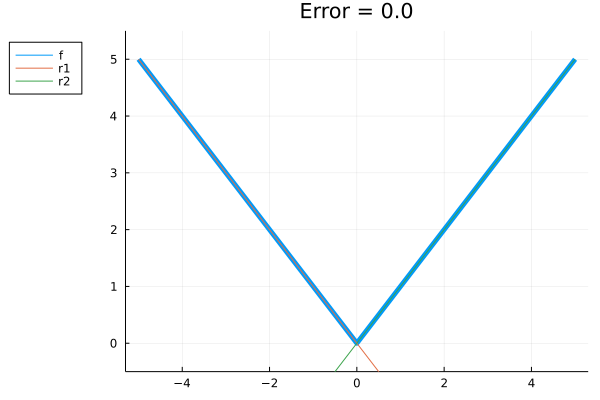

In [5]:
prb = create(abs, collect(-5.0:0.1:5.0), 2, Gurobi.Optimizer)
fit!(prb);
plot(prb)

<b>After finding the piecewise linearization, we can use it to optimize the function.
For this, we will create an auxiliary variable $z$, which will be superior to all lines, when minimizing $z$, we will obtain the approximate result (in this case, we will obtain the theoretical result $x = 0$, since the modulus function can be perfectly represented by lines.)<b>

In [6]:
a = prb.linearization.a
b = prb.linearization.b

m = Model(Gurobi.Optimizer)
JuMP.MOI.set(m, JuMP.MOI.Silent(), true)
@variable(m, -5 <= x <= 5)
@variable(m, z)
for i in 1:2
   @constraint(m, z>=a[i]*x + b[i]) 
end
@objective(m, Min, z)
optimize!(m)
println("x = $(value(x))")
println("obj = $(objective_value(m))")

Academic license - for non-commercial use only - expires 2023-08-07
x = 0.0
obj = 0.0


## 2) Minimize quadratic function
$$\min_{0 \leq x \leq 6} x^2-3x+2 $$

Academic license - for non-commercial use only - expires 2023-08-07


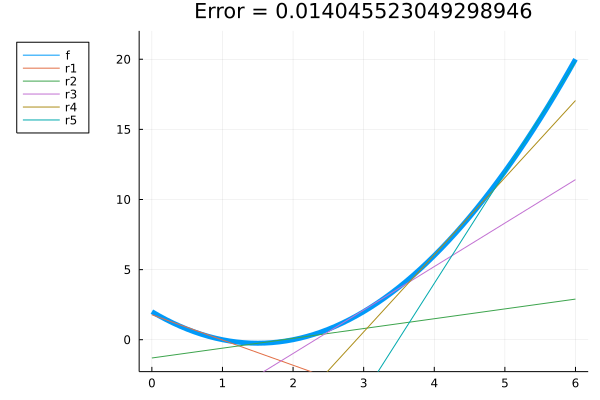

In [7]:
prb = create((x->x^2-3x+2), collect(0.0:0.1:6.0), 5, Gurobi.Optimizer);
fit!(prb);
plot(prb)

<b>After finding the piecewise linearization, we can use it to optimize the function.
For this, we will create an auxiliary variable $z$, which will be superior to all lines, when minimizing $z$, we will obtain the approximate result. In this case, the theoretical result is $x = 1.5$.<b>

In [8]:
a = prb.linearization.a
b = prb.linearization.b

m = Model(Gurobi.Optimizer)
JuMP.MOI.set(m, JuMP.MOI.Silent(), true)
@variable(m, 0 <= x <= 6)
@variable(m, z)
for i in 1:5
   @constraint(m, z>=a[i]*x + b[i]) 
end
@objective(m, Min, z)
optimize!(m)
println("x = $(value(x))")
println("obj = $(objective_value(m))")

Academic license - for non-commercial use only - expires 2023-08-07
x = 1.233333333333509
obj = -0.4399999999998766


## 3) Minimize non-convex function
$$\min_{0 \leq x \leq 5.5} -sin(x) $$

Academic license - for non-commercial use only - expires 2023-08-07


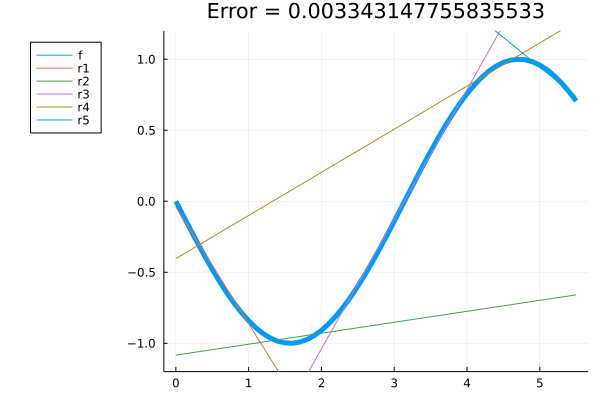

In [9]:
prb = create((x->-sin(x)), collect(0.0:0.1:5.5), 5, Gurobi.Optimizer)
fit!(prb);
plot(prb)

<b>In this case, the optimal solution is $x= \frac{\pi}{2} \approx 1.57$. Since the original function is not convex, the linearization is also not. So we can't use linear programming. If we try it, we can obtain anything as a result.<b>

In [10]:
a = prb.linearization.a
b = prb.linearization.b

m = Model(Gurobi.Optimizer)
JuMP.MOI.set(m, JuMP.MOI.Silent(), true)
@variable(m, 0 <= x <= 6)
@variable(m, z)
for i in 1:5
   @constraint(m, z>=a[i]*x + b[i]) 
end
@objective(m, Min, z)
optimize!(m)
println("x = $(value(x))")
println("obj = $(objective_value(m))")

Academic license - for non-commercial use only - expires 2023-08-07
x = 4.433606298296524
obj = 1.1811087231706932


<b>Since linear programming requires an objective function convex (concave) in minimization (maximization), even if the original function isn't convex (concave), we must impose this property on the linearization if we want to use linear programming.<b> 

Academic license - for non-commercial use only - expires 2023-08-07


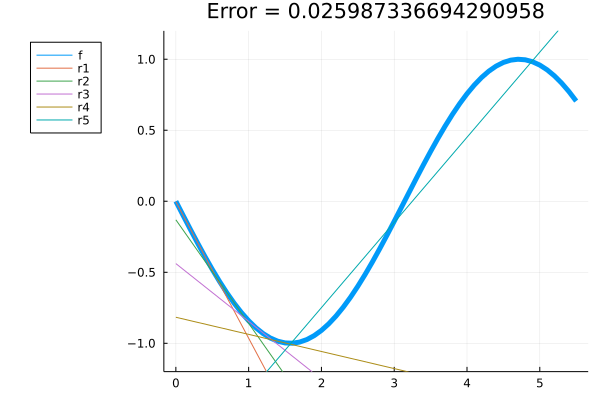

In [11]:
prb = create((x->-sin(x)), collect(0.0:0.1:5.5), 5, Gurobi.Optimizer, force_prop=PiecewiseLinear.convex)
fit!(prb);
plot(prb)

In [12]:
a = prb.linearization.a
b = prb.linearization.b

m = Model(Gurobi.Optimizer)
JuMP.MOI.set(m, JuMP.MOI.Silent(), true)
@variable(m, 0 <= x <= 6)
@variable(m, z)
for i in 1:5
   @constraint(m, z>=a[i]*x + b[i]) 
end
@objective(m, Min, z)
optimize!(m)
println("x = $(value(x))")
println("obj = $(objective_value(m))")

Academic license - for non-commercial use only - expires 2023-08-07
x = 1.5712947823890138
obj = -1.0060826260963405
